In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import scipy.io as sio
from dataclasses import dataclass
from typing import List, Tuple
import os
from dotenv import load_dotenv
load_dotenv()
import tidy3d as td
from tidy3d import web
import numpy as np
from pathlib import Path
from stl import mesh
import matplotlib.pyplot as plt
import re

In [2]:
import sys
import os

# Assuming /AutomationModule is in the root directory of your project
sys.path.append(os.path.abspath(fr'H:\phd stuff\tidy3d'))

from AutomationModule import * 

import AutomationModule as AM

In [3]:
tidy3dAPI = os.environ["API_TIDY3D_KEY"]


In [4]:
lambdas = np.array([8,2])

In [5]:
folder_path = rf"../Structures"
project_name = "20251030_LSU_T_L_2"
postprocess_results = []
runtime_ps = 40e-12
min_steps_per_lambda = 20
cuts=[0.1,0.15,0.2,0.25,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4,1.6,1.8,2,2.1,2.2]
h5_bg = None
for direction in ["z"]: 
    for dirpath, dirnames, filenames in os.walk(folder_path):
        try:
            for filename in filenames:
                if filename.endswith(".h5") and filename=="n_3.30_ff_0.2237.h5":
                    ref = True
                    ff = float(re.search(r'ff_([+-]?\d+(?:\.\d+)?)', filename).group(1))
                    n_eff = np.sqrt((1-ff)+ff*(3.3)**2)
                    n_value = float(re.search(r'n_([+-]?\d+(?:\.\d+)?)', filename).group(1))
                    for cut in cuts:
                        if not (Path(filename).suffix==".h5" or Path(filename).suffix==".stl"):
                            continue 
                        if os.path.isfile(os.path.join(dirpath, filename)):
                            file=os.path.join(dirpath, filename)
                            structure_1 = AM.loadAndRunStructure(key = tidy3dAPI, file_path=file
                                                            ,direction=direction, lambda_range=lambdas,
                                                            box_size=14.3*0.8,runtime_ps=runtime_ps,min_steps_per_lambda=min_steps_per_lambda,
                                                           scaling=1,shuoff_condtion=1e-20, verbose=True, 
                                                           monitors=["flux"], flux_monitor_position=20,cell_size_manual=50,sim_bg=n_eff**2,
                                                           freqs=400, 
                                                           cut_condition=cut, source="planewave", absorbers=130, use_permittivity=False,sim_name=rf"{Path(filename).stem}_size_{cut}" + (rf"_bg_{h5_bg}" if h5_bg else ""),h5_bg=h5_bg,
                                                           )
                            id0=""
                            sim=structure_1.sim
                            folder_desc = rf"H:\phd stuff\tidy3d\data\{project_name}\n_{n_value:.2f}"
                            os.makedirs(folder_desc, exist_ok=True)
                            sim_name=rf"LSU_{Path(filename).stem}_size_{cut}"
                            if os.path.exists(os.path.join(folder_desc, sim_name+".txt")):
                                print("Exist!")
                            else:
                                if ref:
                                    sim0=sim.copy(update={"structures":[]})
                                    id0 =web.upload(sim0, folder_name=project_name,task_name=sim_name+"_0", verbose=True)
                                    web.start(task_id = id0)
                                    web.monitor(id0)
                                    ref=False

                                id =web.upload(sim, folder_name=project_name,task_name=sim_name, verbose=True)
                                ids = id0+'\n' + id
                                with open(os.path.join(folder_desc, sim_name+".txt"), "w") as file:
                                    # Write the string to the file
                                    file.write(ids)
                                web.start(task_id = id)
                                web.monitor(id)
        except Exception as e:
            print(f"Error processing {dirpath}: {e}")
        
    



Configured successfully.


17:11:02 W. Europe Standard Time Created task 'LSU_n_3.30_ff_0.2237_size_0.1_0' 
                                 with task_id                                   
                                 'fdve-03a14cbf-2934-446d-9042-b9497c9603a2' and
                                 task_type 'FDTD'.

                                 View task using web UI at                      
                                 ]8;id=833265;https://tidy3d.simulation.cloud/workbench?taskId=fdve-03a14cbf-2934-446d-9042-b9497c9603a2\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=198423;https://tidy3d.simulation.cloud/workbench?taskId=fdve-03a14cbf-2934-446d-9042-b9497c9603a2\task]8;;\
                                 ]8;id=198423;https://tidy3d.simulation.cloud/workbench?taskId=fdve-03a14cbf-2934-446d-9042-b9497c9603a2\Id]8;;\]8;id=833265;https://tidy3d.simulation.cloud/workbench?taskId=fdve-03a14cbf-2934-446d-9042-b9497c9603a2\=]8;;\]8;id=93310;https://tidy3d.simulation.cloud/workbench?taskId=fdve-03a14cbf-2934-446d-9042-b9497c9603a2\fdve]8;;\]8;id=833265;https://tidy3d.simulation.cloud/workbench?taskId=fdve-03a14cbf-2934-446d-9042-b9497c9603a2\-03a14cbf-2934-446d-9042-b9497c9603a2']8;;\.

                                 Task folder: ]8;id=26985;https://tidy3d.simulation.cloud/folders/folder-dfb4eebc-e1d3-4573-a304-71af1890e7e7\'20251030_LSU_T_L_2']8;;\.

Output()

17:11:04 W. Europe Standard Time Maximum FlexCredit cost: 1.094. Minimum cost   
                                 depends on task execution details. Use         
                                 'web.real_cost(task_id)' to get the billed     
                                 FlexCredit cost after a simulation run.

17:11:05 W. Europe Standard Time status = queued

                                 To cancel the simulation, use                  
                                 'web.abort(task_id)' or 'web.delete(task_id)'  
                                 or abort/delete the task in the web UI.        
                                 Terminating the Python script will not stop the
                                 job running on the cloud.

Output()

17:11:12 W. Europe Standard Time starting up solver

                                 running solver

Output()

17:14:09 W. Europe Standard Time status = postprocess

Output()

17:14:11 W. Europe Standard Time status = success

17:14:13 W. Europe Standard Time View simulation result at                      
                                 ]8;id=723704;https://tidy3d.simulation.cloud/workbench?taskId=fdve-03a14cbf-2934-446d-9042-b9497c9603a2\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=343748;https://tidy3d.simulation.cloud/workbench?taskId=fdve-03a14cbf-2934-446d-9042-b9497c9603a2\task]8;;\
                                 ]8;id=343748;https://tidy3d.simulation.cloud/workbench?taskId=fdve-03a14cbf-2934-446d-9042-b9497c9603a2\Id]8;;\]8;id=723704;https://tidy3d.simulation.cloud/workbench?taskId=fdve-03a14cbf-2934-446d-9042-b9497c9603a2\=]8;;\]8;id=521461;https://tidy3d.simulation.cloud/workbench?taskId=fdve-03a14cbf-2934-446d-9042-b9497c9603a2\fdve]8;;\]8;id=723704;https://tidy3d.simulation.cloud/workbench?taskId=fdve-03a14cbf-2934-446d-9042-b9497c9603a2\-03a14cbf-2934-446d-9042-b9497c9603a2']8;;\.

                                 Created task 'LSU_n_3.30_ff_0.2237_size_0.1'   
                                 with task_id                                   
                                 'fdve-60a050b7-d4f5-4ebf-9cb2-db2e7abbbb65' and
                                 task_type 'FDTD'.

                                 View task using web UI at                      
                                 ]8;id=115353;https://tidy3d.simulation.cloud/workbench?taskId=fdve-60a050b7-d4f5-4ebf-9cb2-db2e7abbbb65\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=404024;https://tidy3d.simulation.cloud/workbench?taskId=fdve-60a050b7-d4f5-4ebf-9cb2-db2e7abbbb65\task]8;;\
                                 ]8;id=404024;https://tidy3d.simulation.cloud/workbench?taskId=fdve-60a050b7-d4f5-4ebf-9cb2-db2e7abbbb65\Id]8;;\]8;id=115353;https://tidy3d.simulation.cloud/workbench?taskId=fdve-60a050b7-d4f5-4ebf-9cb2-db2e7abbbb65\=]8;;\]8;id=385350;https://tidy3d.simulation.cloud/workbench?taskId=fdve-60a050b7-d4f5-4ebf-9cb2-db2e7abbbb65\fdve]8;;\]8;id=115353;https://tidy3d.simulation.cloud/workbench?taskId=fdve-60a050b7-d4f5-4ebf-9cb2-db2e7abbbb65\-60a050b7-d4f5-4ebf-9cb2-db2e7abbbb65']8;;\.

                                 Task folder: ]8;id=600125;https://tidy3d.simulation.cloud/folders/folder-dfb4eebc-e1d3-4573-a304-71af1890e7e7\'20251030_LSU_T_L_2']8;;\.

Output()

17:14:19 W. Europe Standard Time Maximum FlexCredit cost: 6.105. Minimum cost   
                                 depends on task execution details. Use         
                                 'web.real_cost(task_id)' to get the billed     
                                 FlexCredit cost after a simulation run.

17:14:20 W. Europe Standard Time status = queued

                                 To cancel the simulation, use                  
                                 'web.abort(task_id)' or 'web.delete(task_id)'  
                                 or abort/delete the task in the web UI.        
                                 Terminating the Python script will not stop the
                                 job running on the cloud.

Output()

17:14:27 W. Europe Standard Time status = preprocess

17:14:34 W. Europe Standard Time starting up solver

                                 running solver

Output()

17:23:12 W. Europe Standard Time status = success

                                 View simulation result at                      
                                 ]8;id=19068;https://tidy3d.simulation.cloud/workbench?taskId=fdve-60a050b7-d4f5-4ebf-9cb2-db2e7abbbb65\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=594726;https://tidy3d.simulation.cloud/workbench?taskId=fdve-60a050b7-d4f5-4ebf-9cb2-db2e7abbbb65\task]8;;\
                                 ]8;id=594726;https://tidy3d.simulation.cloud/workbench?taskId=fdve-60a050b7-d4f5-4ebf-9cb2-db2e7abbbb65\Id]8;;\]8;id=19068;https://tidy3d.simulation.cloud/workbench?taskId=fdve-60a050b7-d4f5-4ebf-9cb2-db2e7abbbb65\=]8;;\]8;id=22739;https://tidy3d.simulation.cloud/workbench?taskId=fdve-60a050b7-d4f5-4ebf-9cb2-db2e7abbbb65\fdve]8;;\]8;id=19068;https://tidy3d.simulation.cloud/workbench?taskId=fdve-60a050b7-d4f5-4ebf-9cb2-db2e7abbbb65\-60a050b7-d4f5-4ebf-9cb2-db2e7abbbb65']8;;\.

Configured successfully.


17:23:14 W. Europe Standard Time Created task 'LSU_n_3.30_ff_0.2237_size_0.15'  
                                 with task_id                                   
                                 'fdve-28ad8289-f511-42ce-aa36-3dbb8bd9ec93' and
                                 task_type 'FDTD'.

                                 View task using web UI at                      
                                 ]8;id=405663;https://tidy3d.simulation.cloud/workbench?taskId=fdve-28ad8289-f511-42ce-aa36-3dbb8bd9ec93\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=948227;https://tidy3d.simulation.cloud/workbench?taskId=fdve-28ad8289-f511-42ce-aa36-3dbb8bd9ec93\task]8;;\
                                 ]8;id=948227;https://tidy3d.simulation.cloud/workbench?taskId=fdve-28ad8289-f511-42ce-aa36-3dbb8bd9ec93\Id]8;;\]8;id=405663;https://tidy3d.simulation.cloud/workbench?taskId=fdve-28ad8289-f511-42ce-aa36-3dbb8bd9ec93\=]8;;\]8;id=165835;https://tidy3d.simulation.cloud/workbench?taskId=fdve-28ad8289-f511-42ce-aa36-3dbb8bd9ec93\fdve]8;;\]8;id=405663;https://tidy3d.simulation.cloud/workbench?taskId=fdve-28ad8289-f511-42ce-aa36-3dbb8bd9ec93\-28ad8289-f511-42ce-aa36-3dbb8bd9ec93']8;;\.

                                 Task folder: ]8;id=736502;https://tidy3d.simulation.cloud/folders/folder-dfb4eebc-e1d3-4573-a304-71af1890e7e7\'20251030_LSU_T_L_2']8;;\.

Output()

17:23:21 W. Europe Standard Time Maximum FlexCredit cost: 6.143. Minimum cost   
                                 depends on task execution details. Use         
                                 'web.real_cost(task_id)' to get the billed     
                                 FlexCredit cost after a simulation run.

17:23:22 W. Europe Standard Time status = queued

                                 To cancel the simulation, use                  
                                 'web.abort(task_id)' or 'web.delete(task_id)'  
                                 or abort/delete the task in the web UI.        
                                 Terminating the Python script will not stop the
                                 job running on the cloud.

Output()

17:23:29 W. Europe Standard Time status = preprocess

17:23:35 W. Europe Standard Time starting up solver

17:23:36 W. Europe Standard Time running solver

Output()

17:32:22 W. Europe Standard Time status = postprocess

Output()

17:32:25 W. Europe Standard Time status = success

17:32:27 W. Europe Standard Time View simulation result at                      
                                 ]8;id=436330;https://tidy3d.simulation.cloud/workbench?taskId=fdve-28ad8289-f511-42ce-aa36-3dbb8bd9ec93\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=19047;https://tidy3d.simulation.cloud/workbench?taskId=fdve-28ad8289-f511-42ce-aa36-3dbb8bd9ec93\task]8;;\
                                 ]8;id=19047;https://tidy3d.simulation.cloud/workbench?taskId=fdve-28ad8289-f511-42ce-aa36-3dbb8bd9ec93\Id]8;;\]8;id=436330;https://tidy3d.simulation.cloud/workbench?taskId=fdve-28ad8289-f511-42ce-aa36-3dbb8bd9ec93\=]8;;\]8;id=862024;https://tidy3d.simulation.cloud/workbench?taskId=fdve-28ad8289-f511-42ce-aa36-3dbb8bd9ec93\fdve]8;;\]8;id=436330;https://tidy3d.simulation.cloud/workbench?taskId=fdve-28ad8289-f511-42ce-aa36-3dbb8bd9ec93\-28ad8289-f511-42ce-aa36-3dbb8bd9ec93']8;;\.

Configured successfully.


17:32:29 W. Europe Standard Time Created task 'LSU_n_3.30_ff_0.2237_size_0.2'   
                                 with task_id                                   
                                 'fdve-541014fe-7a04-4d8f-8e93-69e37a82dca5' and
                                 task_type 'FDTD'.

                                 View task using web UI at                      
                                 ]8;id=625115;https://tidy3d.simulation.cloud/workbench?taskId=fdve-541014fe-7a04-4d8f-8e93-69e37a82dca5\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=252663;https://tidy3d.simulation.cloud/workbench?taskId=fdve-541014fe-7a04-4d8f-8e93-69e37a82dca5\task]8;;\
                                 ]8;id=252663;https://tidy3d.simulation.cloud/workbench?taskId=fdve-541014fe-7a04-4d8f-8e93-69e37a82dca5\Id]8;;\]8;id=625115;https://tidy3d.simulation.cloud/workbench?taskId=fdve-541014fe-7a04-4d8f-8e93-69e37a82dca5\=]8;;\]8;id=297307;https://tidy3d.simulation.cloud/workbench?taskId=fdve-541014fe-7a04-4d8f-8e93-69e37a82dca5\fdve]8;;\]8;id=625115;https://tidy3d.simulation.cloud/workbench?taskId=fdve-541014fe-7a04-4d8f-8e93-69e37a82dca5\-541014fe-7a04-4d8f-8e93-69e37a82dca5']8;;\.

                                 Task folder: ]8;id=52499;https://tidy3d.simulation.cloud/folders/folder-dfb4eebc-e1d3-4573-a304-71af1890e7e7\'20251030_LSU_T_L_2']8;;\.

Output()

17:32:38 W. Europe Standard Time Maximum FlexCredit cost: 6.181. Minimum cost   
                                 depends on task execution details. Use         
                                 'web.real_cost(task_id)' to get the billed     
                                 FlexCredit cost after a simulation run.

17:32:39 W. Europe Standard Time status = queued

                                 To cancel the simulation, use                  
                                 'web.abort(task_id)' or 'web.delete(task_id)'  
                                 or abort/delete the task in the web UI.        
                                 Terminating the Python script will not stop the
                                 job running on the cloud.

Output()

17:32:46 W. Europe Standard Time status = preprocess

17:32:55 W. Europe Standard Time starting up solver

                                 running solver

Output()

17:41:22 W. Europe Standard Time status = postprocess

Output()

17:41:24 W. Europe Standard Time status = success

17:41:26 W. Europe Standard Time View simulation result at                      
                                 ]8;id=191517;https://tidy3d.simulation.cloud/workbench?taskId=fdve-541014fe-7a04-4d8f-8e93-69e37a82dca5\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=686535;https://tidy3d.simulation.cloud/workbench?taskId=fdve-541014fe-7a04-4d8f-8e93-69e37a82dca5\task]8;;\
                                 ]8;id=686535;https://tidy3d.simulation.cloud/workbench?taskId=fdve-541014fe-7a04-4d8f-8e93-69e37a82dca5\Id]8;;\]8;id=191517;https://tidy3d.simulation.cloud/workbench?taskId=fdve-541014fe-7a04-4d8f-8e93-69e37a82dca5\=]8;;\]8;id=402349;https://tidy3d.simulation.cloud/workbench?taskId=fdve-541014fe-7a04-4d8f-8e93-69e37a82dca5\fdve]8;;\]8;id=191517;https://tidy3d.simulation.cloud/workbench?taskId=fdve-541014fe-7a04-4d8f-8e93-69e37a82dca5\-541014fe-7a04-4d8f-8e93-69e37a82dca5']8;;\.

Configured successfully.


17:41:29 W. Europe Standard Time Created task 'LSU_n_3.30_ff_0.2237_size_0.25'  
                                 with task_id                                   
                                 'fdve-a6b6037e-4f24-44db-9ed2-a077ded0b564' and
                                 task_type 'FDTD'.

                                 View task using web UI at                      
                                 ]8;id=947476;https://tidy3d.simulation.cloud/workbench?taskId=fdve-a6b6037e-4f24-44db-9ed2-a077ded0b564\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=660841;https://tidy3d.simulation.cloud/workbench?taskId=fdve-a6b6037e-4f24-44db-9ed2-a077ded0b564\task]8;;\
                                 ]8;id=660841;https://tidy3d.simulation.cloud/workbench?taskId=fdve-a6b6037e-4f24-44db-9ed2-a077ded0b564\Id]8;;\]8;id=947476;https://tidy3d.simulation.cloud/workbench?taskId=fdve-a6b6037e-4f24-44db-9ed2-a077ded0b564\=]8;;\]8;id=226680;https://tidy3d.simulation.cloud/workbench?taskId=fdve-a6b6037e-4f24-44db-9ed2-a077ded0b564\fdve]8;;\]8;id=947476;https://tidy3d.simulation.cloud/workbench?taskId=fdve-a6b6037e-4f24-44db-9ed2-a077ded0b564\-a6b6037e-4f24-44db-9ed2-a077ded0b564']8;;\.

                                 Task folder: ]8;id=319153;https://tidy3d.simulation.cloud/folders/folder-dfb4eebc-e1d3-4573-a304-71af1890e7e7\'20251030_LSU_T_L_2']8;;\.

Output()

17:41:40 W. Europe Standard Time Maximum FlexCredit cost: 6.183. Minimum cost   
                                 depends on task execution details. Use         
                                 'web.real_cost(task_id)' to get the billed     
                                 FlexCredit cost after a simulation run.

17:41:41 W. Europe Standard Time status = queued

                                 To cancel the simulation, use                  
                                 'web.abort(task_id)' or 'web.delete(task_id)'  
                                 or abort/delete the task in the web UI.        
                                 Terminating the Python script will not stop the
                                 job running on the cloud.

Output()

17:41:48 W. Europe Standard Time status = preprocess

17:41:57 W. Europe Standard Time starting up solver

                                 running solver

Output()

17:50:19 W. Europe Standard Time status = postprocess

Output()

17:50:21 W. Europe Standard Time status = success

17:50:23 W. Europe Standard Time View simulation result at                      
                                 ]8;id=233559;https://tidy3d.simulation.cloud/workbench?taskId=fdve-a6b6037e-4f24-44db-9ed2-a077ded0b564\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=131711;https://tidy3d.simulation.cloud/workbench?taskId=fdve-a6b6037e-4f24-44db-9ed2-a077ded0b564\task]8;;\
                                 ]8;id=131711;https://tidy3d.simulation.cloud/workbench?taskId=fdve-a6b6037e-4f24-44db-9ed2-a077ded0b564\Id]8;;\]8;id=233559;https://tidy3d.simulation.cloud/workbench?taskId=fdve-a6b6037e-4f24-44db-9ed2-a077ded0b564\=]8;;\]8;id=894629;https://tidy3d.simulation.cloud/workbench?taskId=fdve-a6b6037e-4f24-44db-9ed2-a077ded0b564\fdve]8;;\]8;id=233559;https://tidy3d.simulation.cloud/workbench?taskId=fdve-a6b6037e-4f24-44db-9ed2-a077ded0b564\-a6b6037e-4f24-44db-9ed2-a077ded0b564']8;;\.

Configured successfully.


17:50:26 W. Europe Standard Time Created task 'LSU_n_3.30_ff_0.2237_size_0.3'   
                                 with task_id                                   
                                 'fdve-c8ece735-7d6b-4610-985f-5cd2ff1a07b9' and
                                 task_type 'FDTD'.

                                 View task using web UI at                      
                                 ]8;id=29047;https://tidy3d.simulation.cloud/workbench?taskId=fdve-c8ece735-7d6b-4610-985f-5cd2ff1a07b9\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=838967;https://tidy3d.simulation.cloud/workbench?taskId=fdve-c8ece735-7d6b-4610-985f-5cd2ff1a07b9\task]8;;\
                                 ]8;id=838967;https://tidy3d.simulation.cloud/workbench?taskId=fdve-c8ece735-7d6b-4610-985f-5cd2ff1a07b9\Id]8;;\]8;id=29047;https://tidy3d.simulation.cloud/workbench?taskId=fdve-c8ece735-7d6b-4610-985f-5cd2ff1a07b9\=]8;;\]8;id=767145;https://tidy3d.simulation.cloud/workbench?taskId=fdve-c8ece735-7d6b-4610-985f-5cd2ff1a07b9\fdve]8;;\]8;id=29047;https://tidy3d.simulation.cloud/workbench?taskId=fdve-c8ece735-7d6b-4610-985f-5cd2ff1a07b9\-c8ece735-7d6b-4610-985f-5cd2ff1a07b9']8;;\.

                                 Task folder: ]8;id=635419;https://tidy3d.simulation.cloud/folders/folder-dfb4eebc-e1d3-4573-a304-71af1890e7e7\'20251030_LSU_T_L_2']8;;\.

Output()

17:50:37 W. Europe Standard Time Maximum FlexCredit cost: 6.211. Minimum cost   
                                 depends on task execution details. Use         
                                 'web.real_cost(task_id)' to get the billed     
                                 FlexCredit cost after a simulation run.

17:50:38 W. Europe Standard Time status = queued

                                 To cancel the simulation, use                  
                                 'web.abort(task_id)' or 'web.delete(task_id)'  
                                 or abort/delete the task in the web UI.        
                                 Terminating the Python script will not stop the
                                 job running on the cloud.

Output()

17:50:47 W. Europe Standard Time status = preprocess

17:50:54 W. Europe Standard Time starting up solver

                                 running solver

Output()

17:59:24 W. Europe Standard Time status = postprocess

Output()

17:59:28 W. Europe Standard Time status = success

17:59:30 W. Europe Standard Time View simulation result at                      
                                 ]8;id=766453;https://tidy3d.simulation.cloud/workbench?taskId=fdve-c8ece735-7d6b-4610-985f-5cd2ff1a07b9\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=304843;https://tidy3d.simulation.cloud/workbench?taskId=fdve-c8ece735-7d6b-4610-985f-5cd2ff1a07b9\task]8;;\
                                 ]8;id=304843;https://tidy3d.simulation.cloud/workbench?taskId=fdve-c8ece735-7d6b-4610-985f-5cd2ff1a07b9\Id]8;;\]8;id=766453;https://tidy3d.simulation.cloud/workbench?taskId=fdve-c8ece735-7d6b-4610-985f-5cd2ff1a07b9\=]8;;\]8;id=6869;https://tidy3d.simulation.cloud/workbench?taskId=fdve-c8ece735-7d6b-4610-985f-5cd2ff1a07b9\fdve]8;;\]8;id=766453;https://tidy3d.simulation.cloud/workbench?taskId=fdve-c8ece735-7d6b-4610-985f-5cd2ff1a07b9\-c8ece735-7d6b-4610-985f-5cd2ff1a07b9']8;;\.

Configured successfully.


17:59:34 W. Europe Standard Time Created task 'LSU_n_3.30_ff_0.2237_size_0.4'   
                                 with task_id                                   
                                 'fdve-e32baccd-327b-4c6e-b87a-e03d0909bd56' and
                                 task_type 'FDTD'.

                                 View task using web UI at                      
                                 ]8;id=114555;https://tidy3d.simulation.cloud/workbench?taskId=fdve-e32baccd-327b-4c6e-b87a-e03d0909bd56\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=381798;https://tidy3d.simulation.cloud/workbench?taskId=fdve-e32baccd-327b-4c6e-b87a-e03d0909bd56\task]8;;\
                                 ]8;id=381798;https://tidy3d.simulation.cloud/workbench?taskId=fdve-e32baccd-327b-4c6e-b87a-e03d0909bd56\Id]8;;\]8;id=114555;https://tidy3d.simulation.cloud/workbench?taskId=fdve-e32baccd-327b-4c6e-b87a-e03d0909bd56\=]8;;\]8;id=903546;https://tidy3d.simulation.cloud/workbench?taskId=fdve-e32baccd-327b-4c6e-b87a-e03d0909bd56\fdve]8;;\]8;id=114555;https://tidy3d.simulation.cloud/workbench?taskId=fdve-e32baccd-327b-4c6e-b87a-e03d0909bd56\-e32baccd-327b-4c6e-b87a-e03d0909bd56']8;;\.

                                 Task folder: ]8;id=727559;https://tidy3d.simulation.cloud/folders/folder-dfb4eebc-e1d3-4573-a304-71af1890e7e7\'20251030_LSU_T_L_2']8;;\.

Output()

17:59:48 W. Europe Standard Time Maximum FlexCredit cost: 6.295. Minimum cost   
                                 depends on task execution details. Use         
                                 'web.real_cost(task_id)' to get the billed     
                                 FlexCredit cost after a simulation run.

17:59:49 W. Europe Standard Time status = queued

                                 To cancel the simulation, use                  
                                 'web.abort(task_id)' or 'web.delete(task_id)'  
                                 or abort/delete the task in the web UI.        
                                 Terminating the Python script will not stop the
                                 job running on the cloud.

Output()

17:59:59 W. Europe Standard Time status = preprocess

18:00:07 W. Europe Standard Time starting up solver

18:00:08 W. Europe Standard Time running solver

Output()

18:08:51 W. Europe Standard Time status = postprocess

Output()

18:08:53 W. Europe Standard Time status = success

18:08:55 W. Europe Standard Time View simulation result at                      
                                 ]8;id=238013;https://tidy3d.simulation.cloud/workbench?taskId=fdve-e32baccd-327b-4c6e-b87a-e03d0909bd56\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=468778;https://tidy3d.simulation.cloud/workbench?taskId=fdve-e32baccd-327b-4c6e-b87a-e03d0909bd56\task]8;;\
                                 ]8;id=468778;https://tidy3d.simulation.cloud/workbench?taskId=fdve-e32baccd-327b-4c6e-b87a-e03d0909bd56\Id]8;;\]8;id=238013;https://tidy3d.simulation.cloud/workbench?taskId=fdve-e32baccd-327b-4c6e-b87a-e03d0909bd56\=]8;;\]8;id=310037;https://tidy3d.simulation.cloud/workbench?taskId=fdve-e32baccd-327b-4c6e-b87a-e03d0909bd56\fdve]8;;\]8;id=238013;https://tidy3d.simulation.cloud/workbench?taskId=fdve-e32baccd-327b-4c6e-b87a-e03d0909bd56\-e32baccd-327b-4c6e-b87a-e03d0909bd56']8;;\.

Configured successfully.


18:09:00 W. Europe Standard Time Created task 'LSU_n_3.30_ff_0.2237_size_0.5'   
                                 with task_id                                   
                                 'fdve-41bffeb6-2897-4bd6-83db-f1e5a99c24ce' and
                                 task_type 'FDTD'.

                                 View task using web UI at                      
                                 ]8;id=827960;https://tidy3d.simulation.cloud/workbench?taskId=fdve-41bffeb6-2897-4bd6-83db-f1e5a99c24ce\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=498176;https://tidy3d.simulation.cloud/workbench?taskId=fdve-41bffeb6-2897-4bd6-83db-f1e5a99c24ce\task]8;;\
                                 ]8;id=498176;https://tidy3d.simulation.cloud/workbench?taskId=fdve-41bffeb6-2897-4bd6-83db-f1e5a99c24ce\Id]8;;\]8;id=827960;https://tidy3d.simulation.cloud/workbench?taskId=fdve-41bffeb6-2897-4bd6-83db-f1e5a99c24ce\=]8;;\]8;id=521487;https://tidy3d.simulation.cloud/workbench?taskId=fdve-41bffeb6-2897-4bd6-83db-f1e5a99c24ce\fdve]8;;\]8;id=827960;https://tidy3d.simulation.cloud/workbench?taskId=fdve-41bffeb6-2897-4bd6-83db-f1e5a99c24ce\-41bffeb6-2897-4bd6-83db-f1e5a99c24ce']8;;\.

                                 Task folder: ]8;id=801542;https://tidy3d.simulation.cloud/folders/folder-dfb4eebc-e1d3-4573-a304-71af1890e7e7\'20251030_LSU_T_L_2']8;;\.

Output()

18:09:19 W. Europe Standard Time Maximum FlexCredit cost: 6.355. Minimum cost   
                                 depends on task execution details. Use         
                                 'web.real_cost(task_id)' to get the billed     
                                 FlexCredit cost after a simulation run.

18:09:22 W. Europe Standard Time status = queued

                                 To cancel the simulation, use                  
                                 'web.abort(task_id)' or 'web.delete(task_id)'  
                                 or abort/delete the task in the web UI.        
                                 Terminating the Python script will not stop the
                                 job running on the cloud.

Output()

18:09:31 W. Europe Standard Time status = preprocess

18:09:42 W. Europe Standard Time starting up solver

                                 running solver

Output()

18:18:15 W. Europe Standard Time status = postprocess

Output()

18:18:20 W. Europe Standard Time View simulation result at                      
                                 ]8;id=592233;https://tidy3d.simulation.cloud/workbench?taskId=fdve-41bffeb6-2897-4bd6-83db-f1e5a99c24ce\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=365685;https://tidy3d.simulation.cloud/workbench?taskId=fdve-41bffeb6-2897-4bd6-83db-f1e5a99c24ce\task]8;;\
                                 ]8;id=365685;https://tidy3d.simulation.cloud/workbench?taskId=fdve-41bffeb6-2897-4bd6-83db-f1e5a99c24ce\Id]8;;\]8;id=592233;https://tidy3d.simulation.cloud/workbench?taskId=fdve-41bffeb6-2897-4bd6-83db-f1e5a99c24ce\=]8;;\]8;id=767593;https://tidy3d.simulation.cloud/workbench?taskId=fdve-41bffeb6-2897-4bd6-83db-f1e5a99c24ce\fdve]8;;\]8;id=592233;https://tidy3d.simulation.cloud/workbench?taskId=fdve-41bffeb6-2897-4bd6-83db-f1e5a99c24ce\-41bffeb6-2897-4bd6-83db-f1e5a99c24ce']8;;\.

Configured successfully.


18:18:25 W. Europe Standard Time Created task 'LSU_n_3.30_ff_0.2237_size_0.6'   
                                 with task_id                                   
                                 'fdve-418ba13a-e724-40d9-804c-353da2715d68' and
                                 task_type 'FDTD'.

                                 View task using web UI at                      
                                 ]8;id=15691;https://tidy3d.simulation.cloud/workbench?taskId=fdve-418ba13a-e724-40d9-804c-353da2715d68\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=408599;https://tidy3d.simulation.cloud/workbench?taskId=fdve-418ba13a-e724-40d9-804c-353da2715d68\task]8;;\
                                 ]8;id=408599;https://tidy3d.simulation.cloud/workbench?taskId=fdve-418ba13a-e724-40d9-804c-353da2715d68\Id]8;;\]8;id=15691;https://tidy3d.simulation.cloud/workbench?taskId=fdve-418ba13a-e724-40d9-804c-353da2715d68\=]8;;\]8;id=526910;https://tidy3d.simulation.cloud/workbench?taskId=fdve-418ba13a-e724-40d9-804c-353da2715d68\fdve]8;;\]8;id=15691;https://tidy3d.simulation.cloud/workbench?taskId=fdve-418ba13a-e724-40d9-804c-353da2715d68\-418ba13a-e724-40d9-804c-353da2715d68']8;;\.

                                 Task folder: ]8;id=523328;https://tidy3d.simulation.cloud/folders/folder-dfb4eebc-e1d3-4573-a304-71af1890e7e7\'20251030_LSU_T_L_2']8;;\.

Output()

18:19:00 W. Europe Standard Time Maximum FlexCredit cost: 6.421. Minimum cost   
                                 depends on task execution details. Use         
                                 'web.real_cost(task_id)' to get the billed     
                                 FlexCredit cost after a simulation run.

18:19:01 W. Europe Standard Time status = queued

                                 To cancel the simulation, use                  
                                 'web.abort(task_id)' or 'web.delete(task_id)'  
                                 or abort/delete the task in the web UI.        
                                 Terminating the Python script will not stop the
                                 job running on the cloud.

Output()

18:19:09 W. Europe Standard Time status = preprocess

18:19:22 W. Europe Standard Time starting up solver

18:19:23 W. Europe Standard Time running solver

Output()

18:27:59 W. Europe Standard Time status = postprocess

Output()

18:28:03 W. Europe Standard Time status = success

18:28:05 W. Europe Standard Time View simulation result at                      
                                 ]8;id=631728;https://tidy3d.simulation.cloud/workbench?taskId=fdve-418ba13a-e724-40d9-804c-353da2715d68\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=41173;https://tidy3d.simulation.cloud/workbench?taskId=fdve-418ba13a-e724-40d9-804c-353da2715d68\task]8;;\
                                 ]8;id=41173;https://tidy3d.simulation.cloud/workbench?taskId=fdve-418ba13a-e724-40d9-804c-353da2715d68\Id]8;;\]8;id=631728;https://tidy3d.simulation.cloud/workbench?taskId=fdve-418ba13a-e724-40d9-804c-353da2715d68\=]8;;\]8;id=762793;https://tidy3d.simulation.cloud/workbench?taskId=fdve-418ba13a-e724-40d9-804c-353da2715d68\fdve]8;;\]8;id=631728;https://tidy3d.simulation.cloud/workbench?taskId=fdve-418ba13a-e724-40d9-804c-353da2715d68\-418ba13a-e724-40d9-804c-353da2715d68']8;;\.

Configured successfully.


18:28:10 W. Europe Standard Time Created task 'LSU_n_3.30_ff_0.2237_size_0.7'   
                                 with task_id                                   
                                 'fdve-72784158-05fb-420a-ab1d-adb9ad204884' and
                                 task_type 'FDTD'.

                                 View task using web UI at                      
                                 ]8;id=868996;https://tidy3d.simulation.cloud/workbench?taskId=fdve-72784158-05fb-420a-ab1d-adb9ad204884\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=526934;https://tidy3d.simulation.cloud/workbench?taskId=fdve-72784158-05fb-420a-ab1d-adb9ad204884\task]8;;\
                                 ]8;id=526934;https://tidy3d.simulation.cloud/workbench?taskId=fdve-72784158-05fb-420a-ab1d-adb9ad204884\Id]8;;\]8;id=868996;https://tidy3d.simulation.cloud/workbench?taskId=fdve-72784158-05fb-420a-ab1d-adb9ad204884\=]8;;\]8;id=374251;https://tidy3d.simulation.cloud/workbench?taskId=fdve-72784158-05fb-420a-ab1d-adb9ad204884\fdve]8;;\]8;id=868996;https://tidy3d.simulation.cloud/workbench?taskId=fdve-72784158-05fb-420a-ab1d-adb9ad204884\-72784158-05fb-420a-ab1d-adb9ad204884']8;;\.

                                 Task folder: ]8;id=148499;https://tidy3d.simulation.cloud/folders/folder-dfb4eebc-e1d3-4573-a304-71af1890e7e7\'20251030_LSU_T_L_2']8;;\.

Output()

18:28:45 W. Europe Standard Time Maximum FlexCredit cost: 6.501. Minimum cost   
                                 depends on task execution details. Use         
                                 'web.real_cost(task_id)' to get the billed     
                                 FlexCredit cost after a simulation run.

18:28:58 W. Europe Standard Time status = queued

                                 To cancel the simulation, use                  
                                 'web.abort(task_id)' or 'web.delete(task_id)'  
                                 or abort/delete the task in the web UI.        
                                 Terminating the Python script will not stop the
                                 job running on the cloud.

Output()

18:29:21 W. Europe Standard Time status = preprocess

18:29:37 W. Europe Standard Time starting up solver

                                 running solver

Output()

18:38:03 W. Europe Standard Time status = postprocess

Output()

18:38:07 W. Europe Standard Time status = success

18:38:09 W. Europe Standard Time View simulation result at                      
                                 ]8;id=213305;https://tidy3d.simulation.cloud/workbench?taskId=fdve-72784158-05fb-420a-ab1d-adb9ad204884\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=607866;https://tidy3d.simulation.cloud/workbench?taskId=fdve-72784158-05fb-420a-ab1d-adb9ad204884\task]8;;\
                                 ]8;id=607866;https://tidy3d.simulation.cloud/workbench?taskId=fdve-72784158-05fb-420a-ab1d-adb9ad204884\Id]8;;\]8;id=213305;https://tidy3d.simulation.cloud/workbench?taskId=fdve-72784158-05fb-420a-ab1d-adb9ad204884\=]8;;\]8;id=196141;https://tidy3d.simulation.cloud/workbench?taskId=fdve-72784158-05fb-420a-ab1d-adb9ad204884\fdve]8;;\]8;id=213305;https://tidy3d.simulation.cloud/workbench?taskId=fdve-72784158-05fb-420a-ab1d-adb9ad204884\-72784158-05fb-420a-ab1d-adb9ad204884']8;;\.

Configured successfully.


18:38:15 W. Europe Standard Time Created task 'LSU_n_3.30_ff_0.2237_size_0.8'   
                                 with task_id                                   
                                 'fdve-5d1eb9d1-7639-4a15-95f3-ccd4c3bd59a1' and
                                 task_type 'FDTD'.

                                 View task using web UI at                      
                                 ]8;id=637048;https://tidy3d.simulation.cloud/workbench?taskId=fdve-5d1eb9d1-7639-4a15-95f3-ccd4c3bd59a1\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=65406;https://tidy3d.simulation.cloud/workbench?taskId=fdve-5d1eb9d1-7639-4a15-95f3-ccd4c3bd59a1\task]8;;\
                                 ]8;id=65406;https://tidy3d.simulation.cloud/workbench?taskId=fdve-5d1eb9d1-7639-4a15-95f3-ccd4c3bd59a1\Id]8;;\]8;id=637048;https://tidy3d.simulation.cloud/workbench?taskId=fdve-5d1eb9d1-7639-4a15-95f3-ccd4c3bd59a1\=]8;;\]8;id=181275;https://tidy3d.simulation.cloud/workbench?taskId=fdve-5d1eb9d1-7639-4a15-95f3-ccd4c3bd59a1\fdve]8;;\]8;id=637048;https://tidy3d.simulation.cloud/workbench?taskId=fdve-5d1eb9d1-7639-4a15-95f3-ccd4c3bd59a1\-5d1eb9d1-7639-4a15-95f3-ccd4c3bd59a1']8;;\.

                                 Task folder: ]8;id=281385;https://tidy3d.simulation.cloud/folders/folder-dfb4eebc-e1d3-4573-a304-71af1890e7e7\'20251030_LSU_T_L_2']8;;\.

Output()

18:38:54 W. Europe Standard Time Maximum FlexCredit cost: 6.550. Minimum cost   
                                 depends on task execution details. Use         
                                 'web.real_cost(task_id)' to get the billed     
                                 FlexCredit cost after a simulation run.

18:38:55 W. Europe Standard Time status = queued

                                 To cancel the simulation, use                  
                                 'web.abort(task_id)' or 'web.delete(task_id)'  
                                 or abort/delete the task in the web UI.        
                                 Terminating the Python script will not stop the
                                 job running on the cloud.

Output()

18:39:06 W. Europe Standard Time status = preprocess

18:39:22 W. Europe Standard Time starting up solver

                                 running solver

Output()

18:48:15 W. Europe Standard Time status = postprocess

Output()

18:48:20 W. Europe Standard Time status = success

18:48:22 W. Europe Standard Time View simulation result at                      
                                 ]8;id=322378;https://tidy3d.simulation.cloud/workbench?taskId=fdve-5d1eb9d1-7639-4a15-95f3-ccd4c3bd59a1\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=279387;https://tidy3d.simulation.cloud/workbench?taskId=fdve-5d1eb9d1-7639-4a15-95f3-ccd4c3bd59a1\task]8;;\
                                 ]8;id=279387;https://tidy3d.simulation.cloud/workbench?taskId=fdve-5d1eb9d1-7639-4a15-95f3-ccd4c3bd59a1\Id]8;;\]8;id=322378;https://tidy3d.simulation.cloud/workbench?taskId=fdve-5d1eb9d1-7639-4a15-95f3-ccd4c3bd59a1\=]8;;\]8;id=272752;https://tidy3d.simulation.cloud/workbench?taskId=fdve-5d1eb9d1-7639-4a15-95f3-ccd4c3bd59a1\fdve]8;;\]8;id=322378;https://tidy3d.simulation.cloud/workbench?taskId=fdve-5d1eb9d1-7639-4a15-95f3-ccd4c3bd59a1\-5d1eb9d1-7639-4a15-95f3-ccd4c3bd59a1']8;;\.

Configured successfully.


18:48:28 W. Europe Standard Time Created task 'LSU_n_3.30_ff_0.2237_size_0.9'   
                                 with task_id                                   
                                 'fdve-7d218770-ee05-4f05-a1e9-976c3ef59d74' and
                                 task_type 'FDTD'.

                                 View task using web UI at                      
                                 ]8;id=2751;https://tidy3d.simulation.cloud/workbench?taskId=fdve-7d218770-ee05-4f05-a1e9-976c3ef59d74\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=821640;https://tidy3d.simulation.cloud/workbench?taskId=fdve-7d218770-ee05-4f05-a1e9-976c3ef59d74\task]8;;\
                                 ]8;id=821640;https://tidy3d.simulation.cloud/workbench?taskId=fdve-7d218770-ee05-4f05-a1e9-976c3ef59d74\Id]8;;\]8;id=2751;https://tidy3d.simulation.cloud/workbench?taskId=fdve-7d218770-ee05-4f05-a1e9-976c3ef59d74\=]8;;\]8;id=922097;https://tidy3d.simulation.cloud/workbench?taskId=fdve-7d218770-ee05-4f05-a1e9-976c3ef59d74\fdve]8;;\]8;id=2751;https://tidy3d.simulation.cloud/workbench?taskId=fdve-7d218770-ee05-4f05-a1e9-976c3ef59d74\-7d218770-ee05-4f05-a1e9-976c3ef59d74']8;;\.

                                 Task folder: ]8;id=697886;https://tidy3d.simulation.cloud/folders/folder-dfb4eebc-e1d3-4573-a304-71af1890e7e7\'20251030_LSU_T_L_2']8;;\.

Output()

18:49:08 W. Europe Standard Time Maximum FlexCredit cost: 6.629. Minimum cost   
                                 depends on task execution details. Use         
                                 'web.real_cost(task_id)' to get the billed     
                                 FlexCredit cost after a simulation run.

18:49:09 W. Europe Standard Time status = queued

                                 To cancel the simulation, use                  
                                 'web.abort(task_id)' or 'web.delete(task_id)'  
                                 or abort/delete the task in the web UI.        
                                 Terminating the Python script will not stop the
                                 job running on the cloud.

Output()

18:49:21 W. Europe Standard Time status = preprocess

18:49:36 W. Europe Standard Time starting up solver

                                 running solver

Output()

18:58:24 W. Europe Standard Time status = postprocess

Output()

18:58:30 W. Europe Standard Time status = success

18:58:32 W. Europe Standard Time View simulation result at                      
                                 ]8;id=654704;https://tidy3d.simulation.cloud/workbench?taskId=fdve-7d218770-ee05-4f05-a1e9-976c3ef59d74\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=917033;https://tidy3d.simulation.cloud/workbench?taskId=fdve-7d218770-ee05-4f05-a1e9-976c3ef59d74\task]8;;\
                                 ]8;id=917033;https://tidy3d.simulation.cloud/workbench?taskId=fdve-7d218770-ee05-4f05-a1e9-976c3ef59d74\Id]8;;\]8;id=654704;https://tidy3d.simulation.cloud/workbench?taskId=fdve-7d218770-ee05-4f05-a1e9-976c3ef59d74\=]8;;\]8;id=140921;https://tidy3d.simulation.cloud/workbench?taskId=fdve-7d218770-ee05-4f05-a1e9-976c3ef59d74\fdve]8;;\]8;id=654704;https://tidy3d.simulation.cloud/workbench?taskId=fdve-7d218770-ee05-4f05-a1e9-976c3ef59d74\-7d218770-ee05-4f05-a1e9-976c3ef59d74']8;;\.

Configured successfully.


18:58:39 W. Europe Standard Time Created task 'LSU_n_3.30_ff_0.2237_size_1' with
                                 task_id                                        
                                 'fdve-941cc87b-e975-4d61-84b6-b4935c6465fb' and
                                 task_type 'FDTD'.

                                 View task using web UI at                      
                                 ]8;id=844598;https://tidy3d.simulation.cloud/workbench?taskId=fdve-941cc87b-e975-4d61-84b6-b4935c6465fb\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=115572;https://tidy3d.simulation.cloud/workbench?taskId=fdve-941cc87b-e975-4d61-84b6-b4935c6465fb\task]8;;\
                                 ]8;id=115572;https://tidy3d.simulation.cloud/workbench?taskId=fdve-941cc87b-e975-4d61-84b6-b4935c6465fb\Id]8;;\]8;id=844598;https://tidy3d.simulation.cloud/workbench?taskId=fdve-941cc87b-e975-4d61-84b6-b4935c6465fb\=]8;;\]8;id=639068;https://tidy3d.simulation.cloud/workbench?taskId=fdve-941cc87b-e975-4d61-84b6-b4935c6465fb\fdve]8;;\]8;id=844598;https://tidy3d.simulation.cloud/workbench?taskId=fdve-941cc87b-e975-4d61-84b6-b4935c6465fb\-941cc87b-e975-4d61-84b6-b4935c6465fb']8;;\.

                                 Task folder: ]8;id=810257;https://tidy3d.simulation.cloud/folders/folder-dfb4eebc-e1d3-4573-a304-71af1890e7e7\'20251030_LSU_T_L_2']8;;\.

Output()

18:59:25 W. Europe Standard Time Maximum FlexCredit cost: 6.697. Minimum cost   
                                 depends on task execution details. Use         
                                 'web.real_cost(task_id)' to get the billed     
                                 FlexCredit cost after a simulation run.

18:59:26 W. Europe Standard Time status = queued

                                 To cancel the simulation, use                  
                                 'web.abort(task_id)' or 'web.delete(task_id)'  
                                 or abort/delete the task in the web UI.        
                                 Terminating the Python script will not stop the
                                 job running on the cloud.

Output()

18:59:39 W. Europe Standard Time status = preprocess

18:59:52 W. Europe Standard Time starting up solver

18:59:53 W. Europe Standard Time running solver

Output()

19:10:21 W. Europe Standard Time status = postprocess

Output()

19:10:28 W. Europe Standard Time status = success

19:10:30 W. Europe Standard Time View simulation result at                      
                                 ]8;id=779096;https://tidy3d.simulation.cloud/workbench?taskId=fdve-941cc87b-e975-4d61-84b6-b4935c6465fb\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=208171;https://tidy3d.simulation.cloud/workbench?taskId=fdve-941cc87b-e975-4d61-84b6-b4935c6465fb\task]8;;\
                                 ]8;id=208171;https://tidy3d.simulation.cloud/workbench?taskId=fdve-941cc87b-e975-4d61-84b6-b4935c6465fb\Id]8;;\]8;id=779096;https://tidy3d.simulation.cloud/workbench?taskId=fdve-941cc87b-e975-4d61-84b6-b4935c6465fb\=]8;;\]8;id=853838;https://tidy3d.simulation.cloud/workbench?taskId=fdve-941cc87b-e975-4d61-84b6-b4935c6465fb\fdve]8;;\]8;id=779096;https://tidy3d.simulation.cloud/workbench?taskId=fdve-941cc87b-e975-4d61-84b6-b4935c6465fb\-941cc87b-e975-4d61-84b6-b4935c6465fb']8;;\.

Configured successfully.


19:10:37 W. Europe Standard Time Created task 'LSU_n_3.30_ff_0.2237_size_1.1'   
                                 with task_id                                   
                                 'fdve-fd0ccb28-97c6-4fb4-a61c-68e18d4b945f' and
                                 task_type 'FDTD'.

                                 View task using web UI at                      
                                 ]8;id=710700;https://tidy3d.simulation.cloud/workbench?taskId=fdve-fd0ccb28-97c6-4fb4-a61c-68e18d4b945f\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=484128;https://tidy3d.simulation.cloud/workbench?taskId=fdve-fd0ccb28-97c6-4fb4-a61c-68e18d4b945f\task]8;;\
                                 ]8;id=484128;https://tidy3d.simulation.cloud/workbench?taskId=fdve-fd0ccb28-97c6-4fb4-a61c-68e18d4b945f\Id]8;;\]8;id=710700;https://tidy3d.simulation.cloud/workbench?taskId=fdve-fd0ccb28-97c6-4fb4-a61c-68e18d4b945f\=]8;;\]8;id=722080;https://tidy3d.simulation.cloud/workbench?taskId=fdve-fd0ccb28-97c6-4fb4-a61c-68e18d4b945f\fdve]8;;\]8;id=710700;https://tidy3d.simulation.cloud/workbench?taskId=fdve-fd0ccb28-97c6-4fb4-a61c-68e18d4b945f\-fd0ccb28-97c6-4fb4-a61c-68e18d4b945f']8;;\.

                                 Task folder: ]8;id=187328;https://tidy3d.simulation.cloud/folders/folder-dfb4eebc-e1d3-4573-a304-71af1890e7e7\'20251030_LSU_T_L_2']8;;\.

Output()

19:11:26 W. Europe Standard Time Maximum FlexCredit cost: 6.759. Minimum cost   
                                 depends on task execution details. Use         
                                 'web.real_cost(task_id)' to get the billed     
                                 FlexCredit cost after a simulation run.

19:11:27 W. Europe Standard Time status = queued

                                 To cancel the simulation, use                  
                                 'web.abort(task_id)' or 'web.delete(task_id)'  
                                 or abort/delete the task in the web UI.        
                                 Terminating the Python script will not stop the
                                 job running on the cloud.

Output()

19:11:40 W. Europe Standard Time status = preprocess

19:12:00 W. Europe Standard Time starting up solver

                                 running solver

Output()

19:20:48 W. Europe Standard Time status = postprocess

Output()

19:20:55 W. Europe Standard Time status = success

19:20:57 W. Europe Standard Time View simulation result at                      
                                 ]8;id=920998;https://tidy3d.simulation.cloud/workbench?taskId=fdve-fd0ccb28-97c6-4fb4-a61c-68e18d4b945f\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=891077;https://tidy3d.simulation.cloud/workbench?taskId=fdve-fd0ccb28-97c6-4fb4-a61c-68e18d4b945f\task]8;;\
                                 ]8;id=891077;https://tidy3d.simulation.cloud/workbench?taskId=fdve-fd0ccb28-97c6-4fb4-a61c-68e18d4b945f\Id]8;;\]8;id=920998;https://tidy3d.simulation.cloud/workbench?taskId=fdve-fd0ccb28-97c6-4fb4-a61c-68e18d4b945f\=]8;;\]8;id=643295;https://tidy3d.simulation.cloud/workbench?taskId=fdve-fd0ccb28-97c6-4fb4-a61c-68e18d4b945f\fdve]8;;\]8;id=920998;https://tidy3d.simulation.cloud/workbench?taskId=fdve-fd0ccb28-97c6-4fb4-a61c-68e18d4b945f\-fd0ccb28-97c6-4fb4-a61c-68e18d4b945f']8;;\.

Configured successfully.


19:21:04 W. Europe Standard Time Created task 'LSU_n_3.30_ff_0.2237_size_1.2'   
                                 with task_id                                   
                                 'fdve-4447ca11-fab7-4329-9196-58c652c8cb25' and
                                 task_type 'FDTD'.

                                 View task using web UI at                      
                                 ]8;id=366797;https://tidy3d.simulation.cloud/workbench?taskId=fdve-4447ca11-fab7-4329-9196-58c652c8cb25\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=782705;https://tidy3d.simulation.cloud/workbench?taskId=fdve-4447ca11-fab7-4329-9196-58c652c8cb25\task]8;;\
                                 ]8;id=782705;https://tidy3d.simulation.cloud/workbench?taskId=fdve-4447ca11-fab7-4329-9196-58c652c8cb25\Id]8;;\]8;id=366797;https://tidy3d.simulation.cloud/workbench?taskId=fdve-4447ca11-fab7-4329-9196-58c652c8cb25\=]8;;\]8;id=935357;https://tidy3d.simulation.cloud/workbench?taskId=fdve-4447ca11-fab7-4329-9196-58c652c8cb25\fdve]8;;\]8;id=366797;https://tidy3d.simulation.cloud/workbench?taskId=fdve-4447ca11-fab7-4329-9196-58c652c8cb25\-4447ca11-fab7-4329-9196-58c652c8cb25']8;;\.

                                 Task folder: ]8;id=789126;https://tidy3d.simulation.cloud/folders/folder-dfb4eebc-e1d3-4573-a304-71af1890e7e7\'20251030_LSU_T_L_2']8;;\.

Output()

19:21:53 W. Europe Standard Time Maximum FlexCredit cost: 6.837. Minimum cost   
                                 depends on task execution details. Use         
                                 'web.real_cost(task_id)' to get the billed     
                                 FlexCredit cost after a simulation run.

19:21:54 W. Europe Standard Time status = queued

                                 To cancel the simulation, use                  
                                 'web.abort(task_id)' or 'web.delete(task_id)'  
                                 or abort/delete the task in the web UI.        
                                 Terminating the Python script will not stop the
                                 job running on the cloud.

Output()

19:22:09 W. Europe Standard Time status = preprocess

19:22:16 W. Europe Standard Time starting up solver

                                 running solver

Output()

19:30:51 W. Europe Standard Time status = postprocess

Output()

19:31:00 W. Europe Standard Time status = success

19:31:02 W. Europe Standard Time View simulation result at                      
                                 ]8;id=739260;https://tidy3d.simulation.cloud/workbench?taskId=fdve-4447ca11-fab7-4329-9196-58c652c8cb25\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=636656;https://tidy3d.simulation.cloud/workbench?taskId=fdve-4447ca11-fab7-4329-9196-58c652c8cb25\task]8;;\
                                 ]8;id=636656;https://tidy3d.simulation.cloud/workbench?taskId=fdve-4447ca11-fab7-4329-9196-58c652c8cb25\Id]8;;\]8;id=739260;https://tidy3d.simulation.cloud/workbench?taskId=fdve-4447ca11-fab7-4329-9196-58c652c8cb25\=]8;;\]8;id=168532;https://tidy3d.simulation.cloud/workbench?taskId=fdve-4447ca11-fab7-4329-9196-58c652c8cb25\fdve]8;;\]8;id=739260;https://tidy3d.simulation.cloud/workbench?taskId=fdve-4447ca11-fab7-4329-9196-58c652c8cb25\-4447ca11-fab7-4329-9196-58c652c8cb25']8;;\.

Configured successfully.


19:31:10 W. Europe Standard Time Created task 'LSU_n_3.30_ff_0.2237_size_1.3'   
                                 with task_id                                   
                                 'fdve-9dc2db97-51ae-4137-b79c-517cd5632f04' and
                                 task_type 'FDTD'.

                                 View task using web UI at                      
                                 ]8;id=919694;https://tidy3d.simulation.cloud/workbench?taskId=fdve-9dc2db97-51ae-4137-b79c-517cd5632f04\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=143629;https://tidy3d.simulation.cloud/workbench?taskId=fdve-9dc2db97-51ae-4137-b79c-517cd5632f04\task]8;;\
                                 ]8;id=143629;https://tidy3d.simulation.cloud/workbench?taskId=fdve-9dc2db97-51ae-4137-b79c-517cd5632f04\Id]8;;\]8;id=919694;https://tidy3d.simulation.cloud/workbench?taskId=fdve-9dc2db97-51ae-4137-b79c-517cd5632f04\=]8;;\]8;id=734590;https://tidy3d.simulation.cloud/workbench?taskId=fdve-9dc2db97-51ae-4137-b79c-517cd5632f04\fdve]8;;\]8;id=919694;https://tidy3d.simulation.cloud/workbench?taskId=fdve-9dc2db97-51ae-4137-b79c-517cd5632f04\-9dc2db97-51ae-4137-b79c-517cd5632f04']8;;\.

                                 Task folder: ]8;id=498027;https://tidy3d.simulation.cloud/folders/folder-dfb4eebc-e1d3-4573-a304-71af1890e7e7\'20251030_LSU_T_L_2']8;;\.

Output()

19:32:03 W. Europe Standard Time Maximum FlexCredit cost: 6.888. Minimum cost   
                                 depends on task execution details. Use         
                                 'web.real_cost(task_id)' to get the billed     
                                 FlexCredit cost after a simulation run.

19:32:04 W. Europe Standard Time status = queued

                                 To cancel the simulation, use                  
                                 'web.abort(task_id)' or 'web.delete(task_id)'  
                                 or abort/delete the task in the web UI.        
                                 Terminating the Python script will not stop the
                                 job running on the cloud.

Output()

19:32:20 W. Europe Standard Time status = preprocess

19:32:29 W. Europe Standard Time starting up solver

                                 running solver

Output()

19:41:00 W. Europe Standard Time status = postprocess

Output()

19:41:11 W. Europe Standard Time status = success

19:41:13 W. Europe Standard Time View simulation result at                      
                                 ]8;id=225246;https://tidy3d.simulation.cloud/workbench?taskId=fdve-9dc2db97-51ae-4137-b79c-517cd5632f04\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=916795;https://tidy3d.simulation.cloud/workbench?taskId=fdve-9dc2db97-51ae-4137-b79c-517cd5632f04\task]8;;\
                                 ]8;id=916795;https://tidy3d.simulation.cloud/workbench?taskId=fdve-9dc2db97-51ae-4137-b79c-517cd5632f04\Id]8;;\]8;id=225246;https://tidy3d.simulation.cloud/workbench?taskId=fdve-9dc2db97-51ae-4137-b79c-517cd5632f04\=]8;;\]8;id=26077;https://tidy3d.simulation.cloud/workbench?taskId=fdve-9dc2db97-51ae-4137-b79c-517cd5632f04\fdve]8;;\]8;id=225246;https://tidy3d.simulation.cloud/workbench?taskId=fdve-9dc2db97-51ae-4137-b79c-517cd5632f04\-9dc2db97-51ae-4137-b79c-517cd5632f04']8;;\.

Configured successfully.


19:41:21 W. Europe Standard Time Created task 'LSU_n_3.30_ff_0.2237_size_1.4'   
                                 with task_id                                   
                                 'fdve-0cef210f-0ad8-4d72-a8c8-4dca1d972809' and
                                 task_type 'FDTD'.

                                 View task using web UI at                      
                                 ]8;id=885812;https://tidy3d.simulation.cloud/workbench?taskId=fdve-0cef210f-0ad8-4d72-a8c8-4dca1d972809\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=194303;https://tidy3d.simulation.cloud/workbench?taskId=fdve-0cef210f-0ad8-4d72-a8c8-4dca1d972809\task]8;;\
                                 ]8;id=194303;https://tidy3d.simulation.cloud/workbench?taskId=fdve-0cef210f-0ad8-4d72-a8c8-4dca1d972809\Id]8;;\]8;id=885812;https://tidy3d.simulation.cloud/workbench?taskId=fdve-0cef210f-0ad8-4d72-a8c8-4dca1d972809\=]8;;\]8;id=611916;https://tidy3d.simulation.cloud/workbench?taskId=fdve-0cef210f-0ad8-4d72-a8c8-4dca1d972809\fdve]8;;\]8;id=885812;https://tidy3d.simulation.cloud/workbench?taskId=fdve-0cef210f-0ad8-4d72-a8c8-4dca1d972809\-0cef210f-0ad8-4d72-a8c8-4dca1d972809']8;;\.

                                 Task folder: ]8;id=124067;https://tidy3d.simulation.cloud/folders/folder-dfb4eebc-e1d3-4573-a304-71af1890e7e7\'20251030_LSU_T_L_2']8;;\.

Output()

19:42:12 W. Europe Standard Time Maximum FlexCredit cost: 6.966. Minimum cost   
                                 depends on task execution details. Use         
                                 'web.real_cost(task_id)' to get the billed     
                                 FlexCredit cost after a simulation run.

19:42:13 W. Europe Standard Time status = queued

                                 To cancel the simulation, use                  
                                 'web.abort(task_id)' or 'web.delete(task_id)'  
                                 or abort/delete the task in the web UI.        
                                 Terminating the Python script will not stop the
                                 job running on the cloud.

Output()

19:42:29 W. Europe Standard Time status = preprocess

19:42:38 W. Europe Standard Time starting up solver

                                 running solver

Output()

19:51:07 W. Europe Standard Time status = postprocess

Output()

19:51:20 W. Europe Standard Time status = success

19:51:22 W. Europe Standard Time View simulation result at                      
                                 ]8;id=41209;https://tidy3d.simulation.cloud/workbench?taskId=fdve-0cef210f-0ad8-4d72-a8c8-4dca1d972809\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=26089;https://tidy3d.simulation.cloud/workbench?taskId=fdve-0cef210f-0ad8-4d72-a8c8-4dca1d972809\task]8;;\
                                 ]8;id=26089;https://tidy3d.simulation.cloud/workbench?taskId=fdve-0cef210f-0ad8-4d72-a8c8-4dca1d972809\Id]8;;\]8;id=41209;https://tidy3d.simulation.cloud/workbench?taskId=fdve-0cef210f-0ad8-4d72-a8c8-4dca1d972809\=]8;;\]8;id=261982;https://tidy3d.simulation.cloud/workbench?taskId=fdve-0cef210f-0ad8-4d72-a8c8-4dca1d972809\fdve]8;;\]8;id=41209;https://tidy3d.simulation.cloud/workbench?taskId=fdve-0cef210f-0ad8-4d72-a8c8-4dca1d972809\-0cef210f-0ad8-4d72-a8c8-4dca1d972809']8;;\.

Configured successfully.


19:51:32 W. Europe Standard Time Created task 'LSU_n_3.30_ff_0.2237_size_1.6'   
                                 with task_id                                   
                                 'fdve-b370fc67-41c0-485e-96b4-c9907d3ac7e9' and
                                 task_type 'FDTD'.

                                 View task using web UI at                      
                                 ]8;id=171866;https://tidy3d.simulation.cloud/workbench?taskId=fdve-b370fc67-41c0-485e-96b4-c9907d3ac7e9\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=232609;https://tidy3d.simulation.cloud/workbench?taskId=fdve-b370fc67-41c0-485e-96b4-c9907d3ac7e9\task]8;;\
                                 ]8;id=232609;https://tidy3d.simulation.cloud/workbench?taskId=fdve-b370fc67-41c0-485e-96b4-c9907d3ac7e9\Id]8;;\]8;id=171866;https://tidy3d.simulation.cloud/workbench?taskId=fdve-b370fc67-41c0-485e-96b4-c9907d3ac7e9\=]8;;\]8;id=73088;https://tidy3d.simulation.cloud/workbench?taskId=fdve-b370fc67-41c0-485e-96b4-c9907d3ac7e9\fdve]8;;\]8;id=171866;https://tidy3d.simulation.cloud/workbench?taskId=fdve-b370fc67-41c0-485e-96b4-c9907d3ac7e9\-b370fc67-41c0-485e-96b4-c9907d3ac7e9']8;;\.

                                 Task folder: ]8;id=158155;https://tidy3d.simulation.cloud/folders/folder-dfb4eebc-e1d3-4573-a304-71af1890e7e7\'20251030_LSU_T_L_2']8;;\.

Output()

19:52:20 W. Europe Standard Time Maximum FlexCredit cost: 7.095. Minimum cost   
                                 depends on task execution details. Use         
                                 'web.real_cost(task_id)' to get the billed     
                                 FlexCredit cost after a simulation run.

19:52:21 W. Europe Standard Time status = queued

                                 To cancel the simulation, use                  
                                 'web.abort(task_id)' or 'web.delete(task_id)'  
                                 or abort/delete the task in the web UI.        
                                 Terminating the Python script will not stop the
                                 job running on the cloud.

Output()

19:52:39 W. Europe Standard Time status = preprocess

19:52:48 W. Europe Standard Time starting up solver

                                 running solver

Output()

20:01:33 W. Europe Standard Time status = postprocess

Output()

20:01:48 W. Europe Standard Time status = success

20:01:50 W. Europe Standard Time View simulation result at                      
                                 ]8;id=660653;https://tidy3d.simulation.cloud/workbench?taskId=fdve-b370fc67-41c0-485e-96b4-c9907d3ac7e9\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=513737;https://tidy3d.simulation.cloud/workbench?taskId=fdve-b370fc67-41c0-485e-96b4-c9907d3ac7e9\task]8;;\
                                 ]8;id=513737;https://tidy3d.simulation.cloud/workbench?taskId=fdve-b370fc67-41c0-485e-96b4-c9907d3ac7e9\Id]8;;\]8;id=660653;https://tidy3d.simulation.cloud/workbench?taskId=fdve-b370fc67-41c0-485e-96b4-c9907d3ac7e9\=]8;;\]8;id=163598;https://tidy3d.simulation.cloud/workbench?taskId=fdve-b370fc67-41c0-485e-96b4-c9907d3ac7e9\fdve]8;;\]8;id=660653;https://tidy3d.simulation.cloud/workbench?taskId=fdve-b370fc67-41c0-485e-96b4-c9907d3ac7e9\-b370fc67-41c0-485e-96b4-c9907d3ac7e9']8;;\.

Configured successfully.


20:02:01 W. Europe Standard Time Created task 'LSU_n_3.30_ff_0.2237_size_1.8'   
                                 with task_id                                   
                                 'fdve-18cea9bb-f11e-47c5-90ea-bc51f46f0574' and
                                 task_type 'FDTD'.

                                 View task using web UI at                      
                                 ]8;id=540992;https://tidy3d.simulation.cloud/workbench?taskId=fdve-18cea9bb-f11e-47c5-90ea-bc51f46f0574\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=251407;https://tidy3d.simulation.cloud/workbench?taskId=fdve-18cea9bb-f11e-47c5-90ea-bc51f46f0574\task]8;;\
                                 ]8;id=251407;https://tidy3d.simulation.cloud/workbench?taskId=fdve-18cea9bb-f11e-47c5-90ea-bc51f46f0574\Id]8;;\]8;id=540992;https://tidy3d.simulation.cloud/workbench?taskId=fdve-18cea9bb-f11e-47c5-90ea-bc51f46f0574\=]8;;\]8;id=157738;https://tidy3d.simulation.cloud/workbench?taskId=fdve-18cea9bb-f11e-47c5-90ea-bc51f46f0574\fdve]8;;\]8;id=540992;https://tidy3d.simulation.cloud/workbench?taskId=fdve-18cea9bb-f11e-47c5-90ea-bc51f46f0574\-18cea9bb-f11e-47c5-90ea-bc51f46f0574']8;;\.

                                 Task folder: ]8;id=451569;https://tidy3d.simulation.cloud/folders/folder-dfb4eebc-e1d3-4573-a304-71af1890e7e7\'20251030_LSU_T_L_2']8;;\.

Output()

20:02:51 W. Europe Standard Time Maximum FlexCredit cost: 7.225. Minimum cost   
                                 depends on task execution details. Use         
                                 'web.real_cost(task_id)' to get the billed     
                                 FlexCredit cost after a simulation run.

20:02:52 W. Europe Standard Time status = queued

                                 To cancel the simulation, use                  
                                 'web.abort(task_id)' or 'web.delete(task_id)'  
                                 or abort/delete the task in the web UI.        
                                 Terminating the Python script will not stop the
                                 job running on the cloud.

Output()

20:03:12 W. Europe Standard Time status = preprocess

20:03:21 W. Europe Standard Time starting up solver

                                 running solver

Output()

20:12:17 W. Europe Standard Time status = postprocess

Output()

20:12:34 W. Europe Standard Time status = success

20:12:36 W. Europe Standard Time View simulation result at                      
                                 ]8;id=989096;https://tidy3d.simulation.cloud/workbench?taskId=fdve-18cea9bb-f11e-47c5-90ea-bc51f46f0574\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=305418;https://tidy3d.simulation.cloud/workbench?taskId=fdve-18cea9bb-f11e-47c5-90ea-bc51f46f0574\task]8;;\
                                 ]8;id=305418;https://tidy3d.simulation.cloud/workbench?taskId=fdve-18cea9bb-f11e-47c5-90ea-bc51f46f0574\Id]8;;\]8;id=989096;https://tidy3d.simulation.cloud/workbench?taskId=fdve-18cea9bb-f11e-47c5-90ea-bc51f46f0574\=]8;;\]8;id=652716;https://tidy3d.simulation.cloud/workbench?taskId=fdve-18cea9bb-f11e-47c5-90ea-bc51f46f0574\fdve]8;;\]8;id=989096;https://tidy3d.simulation.cloud/workbench?taskId=fdve-18cea9bb-f11e-47c5-90ea-bc51f46f0574\-18cea9bb-f11e-47c5-90ea-bc51f46f0574']8;;\.

Configured successfully.


20:12:48 W. Europe Standard Time Created task 'LSU_n_3.30_ff_0.2237_size_2' with
                                 task_id                                        
                                 'fdve-d0265f7a-eb64-455d-b35d-cde9f05d5498' and
                                 task_type 'FDTD'.

                                 View task using web UI at                      
                                 ]8;id=623798;https://tidy3d.simulation.cloud/workbench?taskId=fdve-d0265f7a-eb64-455d-b35d-cde9f05d5498\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=377188;https://tidy3d.simulation.cloud/workbench?taskId=fdve-d0265f7a-eb64-455d-b35d-cde9f05d5498\task]8;;\
                                 ]8;id=377188;https://tidy3d.simulation.cloud/workbench?taskId=fdve-d0265f7a-eb64-455d-b35d-cde9f05d5498\Id]8;;\]8;id=623798;https://tidy3d.simulation.cloud/workbench?taskId=fdve-d0265f7a-eb64-455d-b35d-cde9f05d5498\=]8;;\]8;id=265009;https://tidy3d.simulation.cloud/workbench?taskId=fdve-d0265f7a-eb64-455d-b35d-cde9f05d5498\fdve]8;;\]8;id=623798;https://tidy3d.simulation.cloud/workbench?taskId=fdve-d0265f7a-eb64-455d-b35d-cde9f05d5498\-d0265f7a-eb64-455d-b35d-cde9f05d5498']8;;\.

                                 Task folder: ]8;id=55102;https://tidy3d.simulation.cloud/folders/folder-dfb4eebc-e1d3-4573-a304-71af1890e7e7\'20251030_LSU_T_L_2']8;;\.

Output()

20:13:39 W. Europe Standard Time Maximum FlexCredit cost: 7.354. Minimum cost   
                                 depends on task execution details. Use         
                                 'web.real_cost(task_id)' to get the billed     
                                 FlexCredit cost after a simulation run.

20:13:40 W. Europe Standard Time status = queued

                                 To cancel the simulation, use                  
                                 'web.abort(task_id)' or 'web.delete(task_id)'  
                                 or abort/delete the task in the web UI.        
                                 Terminating the Python script will not stop the
                                 job running on the cloud.

Output()

20:13:58 W. Europe Standard Time status = preprocess

20:14:29 W. Europe Standard Time starting up solver

                                 running solver

Output()

Output()

20:23:30 W. Europe Standard Time status = postprocess

20:23:43 W. Europe Standard Time status = success

20:23:45 W. Europe Standard Time View simulation result at                      
                                 ]8;id=188250;https://tidy3d.simulation.cloud/workbench?taskId=fdve-d0265f7a-eb64-455d-b35d-cde9f05d5498\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=817338;https://tidy3d.simulation.cloud/workbench?taskId=fdve-d0265f7a-eb64-455d-b35d-cde9f05d5498\task]8;;\
                                 ]8;id=817338;https://tidy3d.simulation.cloud/workbench?taskId=fdve-d0265f7a-eb64-455d-b35d-cde9f05d5498\Id]8;;\]8;id=188250;https://tidy3d.simulation.cloud/workbench?taskId=fdve-d0265f7a-eb64-455d-b35d-cde9f05d5498\=]8;;\]8;id=396091;https://tidy3d.simulation.cloud/workbench?taskId=fdve-d0265f7a-eb64-455d-b35d-cde9f05d5498\fdve]8;;\]8;id=188250;https://tidy3d.simulation.cloud/workbench?taskId=fdve-d0265f7a-eb64-455d-b35d-cde9f05d5498\-d0265f7a-eb64-455d-b35d-cde9f05d5498']8;;\.

Configured successfully.


20:23:56 W. Europe Standard Time Created task 'LSU_n_3.30_ff_0.2237_size_2.1'   
                                 with task_id                                   
                                 'fdve-8f4dc876-5320-4f0a-978f-810bfcda28a6' and
                                 task_type 'FDTD'.

                                 View task using web UI at                      
                                 ]8;id=435036;https://tidy3d.simulation.cloud/workbench?taskId=fdve-8f4dc876-5320-4f0a-978f-810bfcda28a6\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=689509;https://tidy3d.simulation.cloud/workbench?taskId=fdve-8f4dc876-5320-4f0a-978f-810bfcda28a6\task]8;;\
                                 ]8;id=689509;https://tidy3d.simulation.cloud/workbench?taskId=fdve-8f4dc876-5320-4f0a-978f-810bfcda28a6\Id]8;;\]8;id=435036;https://tidy3d.simulation.cloud/workbench?taskId=fdve-8f4dc876-5320-4f0a-978f-810bfcda28a6\=]8;;\]8;id=548445;https://tidy3d.simulation.cloud/workbench?taskId=fdve-8f4dc876-5320-4f0a-978f-810bfcda28a6\fdve]8;;\]8;id=435036;https://tidy3d.simulation.cloud/workbench?taskId=fdve-8f4dc876-5320-4f0a-978f-810bfcda28a6\-8f4dc876-5320-4f0a-978f-810bfcda28a6']8;;\.

                                 Task folder: ]8;id=960214;https://tidy3d.simulation.cloud/folders/folder-dfb4eebc-e1d3-4573-a304-71af1890e7e7\'20251030_LSU_T_L_2']8;;\.

Output()

20:24:48 W. Europe Standard Time Maximum FlexCredit cost: 7.430. Minimum cost   
                                 depends on task execution details. Use         
                                 'web.real_cost(task_id)' to get the billed     
                                 FlexCredit cost after a simulation run.

20:24:49 W. Europe Standard Time status = queued

                                 To cancel the simulation, use                  
                                 'web.abort(task_id)' or 'web.delete(task_id)'  
                                 or abort/delete the task in the web UI.        
                                 Terminating the Python script will not stop the
                                 job running on the cloud.

Output()

20:25:07 W. Europe Standard Time status = preprocess

20:25:23 W. Europe Standard Time starting up solver

                                 running solver

Output()

20:40:19 W. Europe Standard Time status = postprocess

Output()

20:40:30 W. Europe Standard Time status = success

20:40:32 W. Europe Standard Time View simulation result at                      
                                 ]8;id=914912;https://tidy3d.simulation.cloud/workbench?taskId=fdve-8f4dc876-5320-4f0a-978f-810bfcda28a6\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=256461;https://tidy3d.simulation.cloud/workbench?taskId=fdve-8f4dc876-5320-4f0a-978f-810bfcda28a6\task]8;;\
                                 ]8;id=256461;https://tidy3d.simulation.cloud/workbench?taskId=fdve-8f4dc876-5320-4f0a-978f-810bfcda28a6\Id]8;;\]8;id=914912;https://tidy3d.simulation.cloud/workbench?taskId=fdve-8f4dc876-5320-4f0a-978f-810bfcda28a6\=]8;;\]8;id=844029;https://tidy3d.simulation.cloud/workbench?taskId=fdve-8f4dc876-5320-4f0a-978f-810bfcda28a6\fdve]8;;\]8;id=914912;https://tidy3d.simulation.cloud/workbench?taskId=fdve-8f4dc876-5320-4f0a-978f-810bfcda28a6\-8f4dc876-5320-4f0a-978f-810bfcda28a6']8;;\.

Configured successfully.


20:40:44 W. Europe Standard Time Created task 'LSU_n_3.30_ff_0.2237_size_2.2'   
                                 with task_id                                   
                                 'fdve-6fc6f51b-b1a5-46bf-bfcc-0fcf4cdc5c6a' and
                                 task_type 'FDTD'.

                                 View task using web UI at                      
                                 ]8;id=644101;https://tidy3d.simulation.cloud/workbench?taskId=fdve-6fc6f51b-b1a5-46bf-bfcc-0fcf4cdc5c6a\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=876497;https://tidy3d.simulation.cloud/workbench?taskId=fdve-6fc6f51b-b1a5-46bf-bfcc-0fcf4cdc5c6a\task]8;;\
                                 ]8;id=876497;https://tidy3d.simulation.cloud/workbench?taskId=fdve-6fc6f51b-b1a5-46bf-bfcc-0fcf4cdc5c6a\Id]8;;\]8;id=644101;https://tidy3d.simulation.cloud/workbench?taskId=fdve-6fc6f51b-b1a5-46bf-bfcc-0fcf4cdc5c6a\=]8;;\]8;id=895521;https://tidy3d.simulation.cloud/workbench?taskId=fdve-6fc6f51b-b1a5-46bf-bfcc-0fcf4cdc5c6a\fdve]8;;\]8;id=644101;https://tidy3d.simulation.cloud/workbench?taskId=fdve-6fc6f51b-b1a5-46bf-bfcc-0fcf4cdc5c6a\-6fc6f51b-b1a5-46bf-bfcc-0fcf4cdc5c6a']8;;\.

                                 Task folder: ]8;id=201447;https://tidy3d.simulation.cloud/folders/folder-dfb4eebc-e1d3-4573-a304-71af1890e7e7\'20251030_LSU_T_L_2']8;;\.

Output()

20:41:40 W. Europe Standard Time Maximum FlexCredit cost: 7.508. Minimum cost   
                                 depends on task execution details. Use         
                                 'web.real_cost(task_id)' to get the billed     
                                 FlexCredit cost after a simulation run.

20:41:51 W. Europe Standard Time status = queued

                                 To cancel the simulation, use                  
                                 'web.abort(task_id)' or 'web.delete(task_id)'  
                                 or abort/delete the task in the web UI.        
                                 Terminating the Python script will not stop the
                                 job running on the cloud.

Output()

20:42:38 W. Europe Standard Time status = preprocess

20:42:49 W. Europe Standard Time starting up solver

                                 running solver

Output()

20:52:03 W. Europe Standard Time status = postprocess

Output()

20:52:25 W. Europe Standard Time status = success

20:52:27 W. Europe Standard Time View simulation result at                      
                                 ]8;id=886382;https://tidy3d.simulation.cloud/workbench?taskId=fdve-6fc6f51b-b1a5-46bf-bfcc-0fcf4cdc5c6a\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=130322;https://tidy3d.simulation.cloud/workbench?taskId=fdve-6fc6f51b-b1a5-46bf-bfcc-0fcf4cdc5c6a\task]8;;\
                                 ]8;id=130322;https://tidy3d.simulation.cloud/workbench?taskId=fdve-6fc6f51b-b1a5-46bf-bfcc-0fcf4cdc5c6a\Id]8;;\]8;id=886382;https://tidy3d.simulation.cloud/workbench?taskId=fdve-6fc6f51b-b1a5-46bf-bfcc-0fcf4cdc5c6a\=]8;;\]8;id=71766;https://tidy3d.simulation.cloud/workbench?taskId=fdve-6fc6f51b-b1a5-46bf-bfcc-0fcf4cdc5c6a\fdve]8;;\]8;id=886382;https://tidy3d.simulation.cloud/workbench?taskId=fdve-6fc6f51b-b1a5-46bf-bfcc-0fcf4cdc5c6a\-6fc6f51b-b1a5-46bf-bfcc-0fcf4cdc5c6a']8;;\.

<Figure size 1280x960 with 0 Axes>

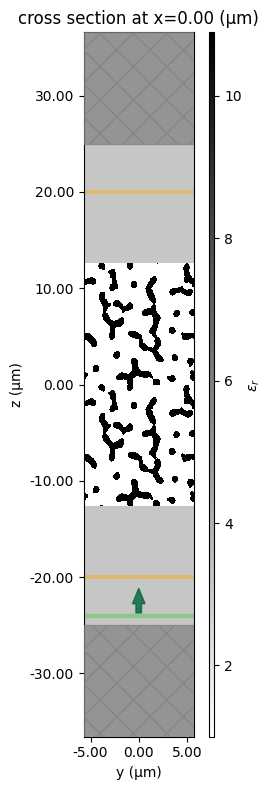

<Figure size 1600x1200 with 0 Axes>

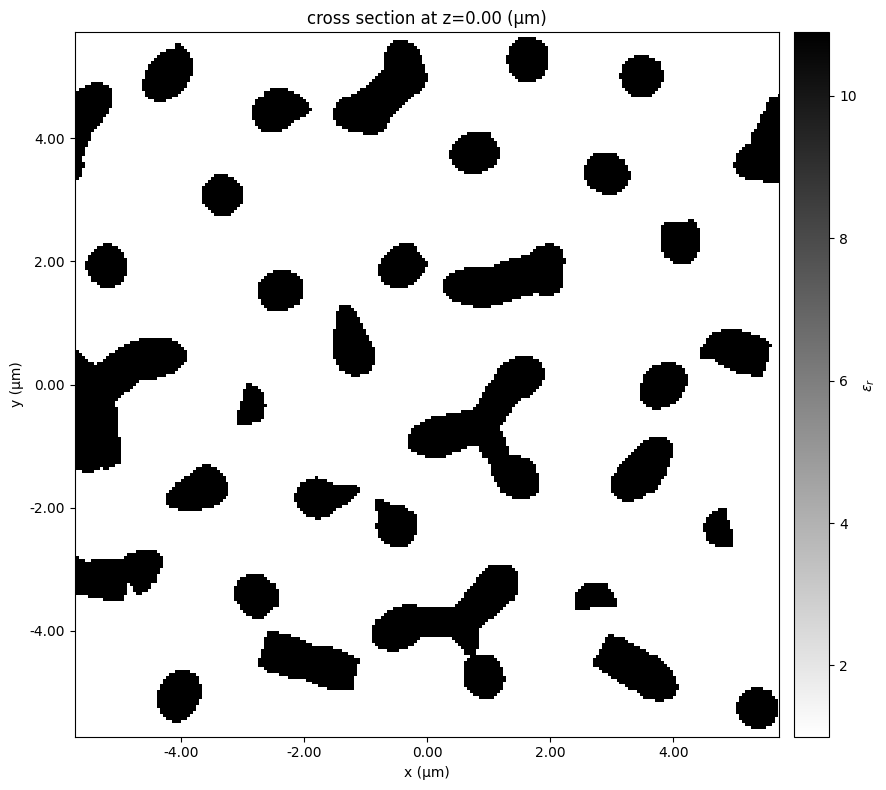

<Figure size 640x480 with 0 Axes>

In [6]:
structure_1.plot_sim_layout()